In [58]:
from cvxopt import matrix, solvers
import numpy as np
from numpy.linalg import inv
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nestle

In [67]:
A_test = matrix([ [-1.0, 0.0, 0.0],[0.0, -1.0, 0.0], [0.0, 0.0, -1.0],[1.0, 0.0, 0.0],[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 1.0, 1.0]])
b_test = matrix([ 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 5.0 ])
c_test = matrix([ 1.0, 1.0, -1.0 ])

In [70]:
sol=solvers.lp(c_test,A_test.T,b_test)

     pcost       dcost       gap    pres   dres   k/t
 0:  1.4000e+00 -1.6200e+01  1e+01  0e+00  2e+00  1e+00
 1:  3.1572e-01 -3.2626e+00  2e+00  1e-16  3e-01  2e-01
 2: -1.8542e+00 -2.9102e+00  9e-01  3e-16  1e-01  1e-01
 3: -1.9983e+00 -2.0098e+00  9e-03  2e-16  1e-03  1e-03
 4: -2.0000e+00 -2.0001e+00  9e-05  2e-16  1e-05  1e-05
 5: -2.0000e+00 -2.0000e+00  9e-07  5e-16  1e-07  1e-07
 6: -2.0000e+00 -2.0000e+00  9e-09  2e-16  1e-09  1e-09
Optimal solution found.


In [68]:
print(sol['x'])

[ 1.95e-10]
[ 1.95e-10]
[ 2.00e+00]



In [72]:
print (sol['primal objective'])

-1.99999999829


In [73]:
print (sol['status'])

optimal


In [74]:
A = np.array(A_test).T
b = np.array(b_test)
c = np.array(c_test)

In [75]:
x_o = np.array([2,2,0]).reshape(3,1)

In [76]:
from numpy.linalg import inv

def simplex_opt(c,A,b,x_o):
    n = x_o.size
    m = b.size
    J = calculate_J(A,b,x_o)
    z = np.zeros((m,1))
    z[J] = calculate_z(A,J,c)
    while (z<0).any():
        k = np.argmin(z)
        dx = calculate_dx(A,J,k,m)
        alpha = recalculate_J(A,b,x_o,J,k,dx)
        x_o = x_o + alpha*dx
        J = calculate_J(A,b,x_o)
        z = np.zeros((m,1))
        z[J] = calculate_z(A,J,c)
        print('Optimal point is \n{}'.format(x_o))
    
def calculate_J(A,b,x_o):
    return np.where((A.dot(x_o)-b==0))[0]

def calculate_z(A,J,c):
    z = -inv(A[J].dot(A[J].T)).dot(A[J]).dot(c)
    print z
    return z

def calculate_dx(A,J,k,m):
    j = np.zeros((m,1))
    j[k] = -1
    dx = inv(A[J]).dot(j[J])
    print dx
    return dx

def recalculate_J(A,b,x,J,k,dx):
    i = np.where(A.dot(dx) > 0)[0]
    j = np.argmin(((b[i]-A[i].dot(x))/(A[i].dot(dx))))
    j = i[j]
    alpha = (b[j]-A[j].T.dot(x))/A[j].T.dot(dx)
    print alpha
    return alpha

def calculate_c(c,x):
    c_in = c.reshape(c.size,1)
    x_in = x.reshape(x.size,1)
    return c_in.T.dot(x_in)

In [55]:
simplex_opt(c,A,b,x_o)

[[-1.]
 [-1.]
 [-1.]]
[[ 0.]
 [ 0.]
 [ 1.]]
[ 1.]
[[-2.]
 [-2.]
 [ 1.]]
Optimal point is 
[[ 2.]
 [ 2.]
 [ 1.]]
[[-1.]
 [ 0.]
 [ 1.]]
[ 1.]
[[-0.]
 [ 2.]
 [-1.]]
Optimal point is 
[[ 1.]
 [ 2.]
 [ 2.]]
[[-1.]
 [ 0.]
 [ 0.]]
[ 1.]
[[ 1.]
 [-1.]
 [ 1.]]
Optimal point is 
[[ 0.]
 [ 2.]
 [ 2.]]
[[ 0.]
 [-1.]
 [ 0.]]
[ 2.]
[[ 1.]
 [ 1.]
 [ 1.]]
Optimal point is 
[[ 0.]
 [ 0.]
 [ 2.]]


In [145]:
from cvxpy import *

C = np.array([[2.0, 1.0],[1.0, 2.0]])
I = np.identity(2)

In [147]:
X = Symmetric(2)
constraints = [lambda_min(X-1/2 * I) >=0,
               lambda_min(I - X) >=0]

obj = Minimize(trace(C*X))

prob = Problem(obj, constraints)
prob.solve()

1.5454860695715197e-08

In [148]:
X.value

matrix([[  6.14336792e-09,  -4.55930550e-09],
        [ -4.55930550e-09,   6.14336792e-09]])

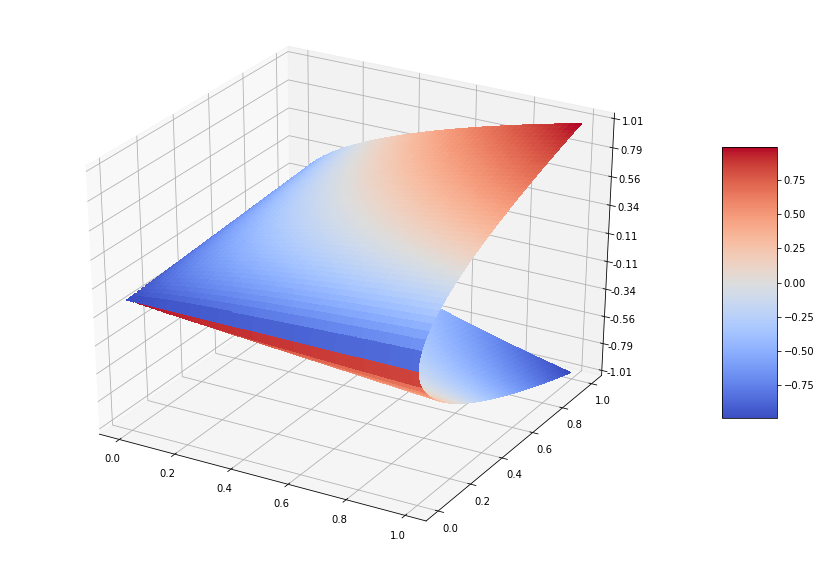

In [120]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')

X = np.arange(0, 1, 0.0025)
Y = np.arange(0, 1, 0.0025)

X, Y = np.meshgrid(X, Y)
R = X + Y
Z1 = np.sqrt(X*Y)
Z2 = -np.sqrt(X*Y)
surf1 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surfsurf1 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf2 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

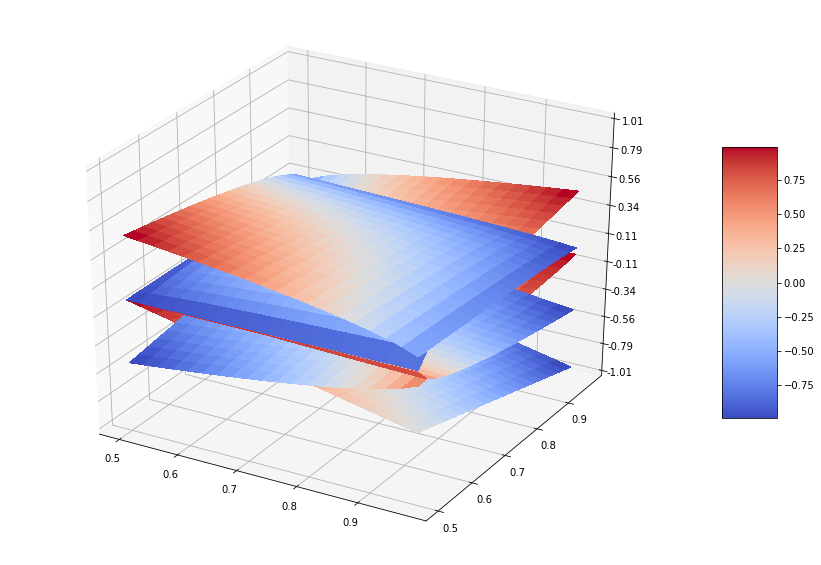

In [123]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')

X = np.arange(0.5001, 1, 0.025)
Y = np.arange(0.5001, 0.99, 0.025)

X, Y = np.meshgrid(X, Y)
R1 = 1 - (X + Y)
Z1 = np.sqrt((1-X)*(1-Y))
Z2 = np.sqrt((X-0.5)*(Y-0.5))
Z3 = -np.sqrt((X-0.5)*(Y-0.5))
Z4 = -np.sqrt((1-X)*(1-Y))
surf1 = ax.plot_surface(X, Y, R1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf2 = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf3 = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf4 = ax.plot_surface(X, Y, Z3, cmap=cm.coolwarm,linewidth=0, antialiased=False)
surf5 = ax.plot_surface(X, Y, Z4, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()